<a href="https://colab.research.google.com/github/Deep-Learning-Assignment/Deep-Learning-Project/blob/IT21184444/IT21184444_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!pip install tensorflow keras


In [19]:
pip install tensorflow matplotlib numpy pandas


In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
# Path to your dataset in Google Drive
dataset_path = "/content/drive/My Drive/Colab Notebooks/DL-assignmemt"

# Initialize the ImageDataGenerator with rescaling and validation split (30% for validation + test)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)



In [9]:
# Training set (70% of total dataset)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),  # Resize images to 299x299 for InceptionV3
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Training subset
    shuffle=True)

Found 11226 images belonging to 10 classes.


In [10]:
# Further split validation and test (remaining 30% split into 20% validation and 10% test)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.33)


In [11]:
# Validation set (20% of total dataset)
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Validation subset
    shuffle=True)

# Test set (10% of total dataset)
test_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Test subset
    shuffle=False)

Found 10744 images belonging to 10 classes.
Found 5287 images belonging to 10 classes.


Load InceptionV3 Pretrained Model

In [12]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pretrained InceptionV3 model without the top (classification) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (they will not be trained)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,911,210 (91.21 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Train the Model

In [10]:
!ls "/content/drive/My Drive"

'Colab Notebooks'  'Getting started.pdf'   passswords.gdoc   SRE-InterviewQ.gdoc   travely.zip


In [13]:
# Train the model for 10 epochs
history = model.fit(
    train_generator,
    epochs=10,  # You can change the number of epochs
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 3354s 9s/step - accuracy: 0.6414 - loss: 1.2131 - val_accuracy: 0.8569 - val_loss: 0.4278
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 143s 404ms/step - accuracy: 0.8643 - loss: 0.3987 - val_accuracy: 0.9003 - val_loss: 0.2922
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 142s 400ms/step - accuracy: 0.8895 - loss: 0.3130 - val_accuracy: 0.9212 - val_loss: 0.2353
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 137s 386ms/step - accuracy: 0.9165 - loss: 0.2527 - val_accuracy: 0.9438 - val_loss: 0.1683
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 143s 390ms/step - accuracy: 0.9317 - loss: 0.1927 - val_accuracy: 0.9527 - val_loss: 0.1421
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 136s 384ms/step - accuracy: 0.9324 - loss: 0.1968 - val_accuracy: 0.9627 - val_loss: 0.1186
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 139s 376ms/step - accuracy: 0.9529 - loss: 0.1401 - val_accuracy: 0.9609 - val_loss: 0.1136
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 138s 391ms/step - accuracy: 0.9563 - loss: 0.1224

Fine-Tuning the Model

In [14]:
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:  # Fine-tune last 50 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=5,  # You can change the number of epochs
    validation_data=validation_generator
)


Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 207s 509ms/step - accuracy: 0.8071 - loss: 0.7417 - val_accuracy: 0.9759 - val_loss: 0.0736
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 142s 402ms/step - accuracy: 0.9574 - loss: 0.1215 - val_accuracy: 0.9951 - val_loss: 0.0293
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 201s 401ms/step - accuracy: 0.9812 - loss: 0.0613 - val_accuracy: 0.9989 - val_loss: 0.0142
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 144s 406ms/step - accuracy: 0.9872 - loss: 0.0438 - val_accuracy: 0.9994 - val_loss: 0.0088
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 201s 404ms/step - accuracy: 0.9931 - loss: 0.0271 - val_accuracy: 0.9999 - val_loss: 0.0050


Evaluate the Model on Test Set

In [16]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.9384 - loss: 0.1902
Test Accuracy: 0.9462833404541016


Plot Accuracy and Loss

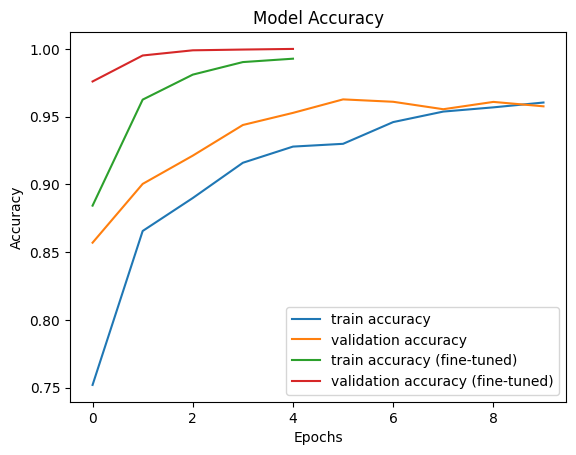

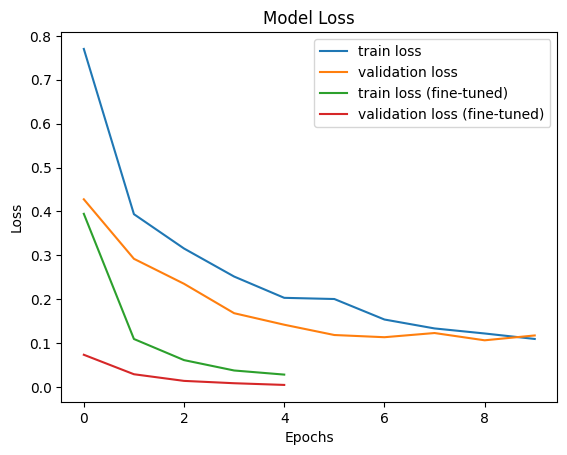

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history_fine.history['accuracy'], label='train accuracy (fine-tuned)')
plt.plot(history_fine.history['val_accuracy'], label='validation accuracy (fine-tuned)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history_fine.history['loss'], label='train loss (fine-tuned)')
plt.plot(history_fine.history['val_loss'], label='validation loss (fine-tuned)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
# Save the model to a file
model.save('/content/drive/MyDrive/Colab Notebooks/DL-assignmemt/inceptionv3_model.h5')
